# **1. Import all necessary packages**

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import random

# **2. Load the Fashion MNIST dataset for image classification**

- Load the Fashion MNIST dataset.
- Create three disjoint sets: train, validation and test (you can use any proportions for these sets).

In [50]:
# Fix randomness
random_seed = 42
np.random.seed(random_seed)
tf.random.set_seed(random_seed)
random.seed(random_seed)

# Load Fashion MNIST dataset
mnist_fashion = fetch_openml('Fashion-MNIST', cache=True)
images_data = mnist_fashion['data']
labels_data = mnist_fashion['target']
labels_data = labels_data.astype('int')

#Normalize pixel values
images_data = images_data/255.0



- It can be seen that the images_data is a dataframe stored with the 784 (28 x 28) values 

In [51]:
images_data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.121569,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.105882,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


- Shuffling this dataframe is shuffling the pixels/input features

In [52]:
# Shuffle the columns
def shuffle_pixels(df):
  # Get a random permutation of the column indices
  shuffled_indices =  np.random.RandomState(42).permutation(len(df.columns)) #Fixing Randonmess
  # Reorder the dataframe based on the shuffled indices
  return df[df.columns[shuffled_indices]]

images_shuffled = shuffle_pixels(images_data)
images_shuffled

,pixel599,pixel591,pixel210,pixel638,pixel175,pixel214,pixel430,pixel260,pixel594,pixel205,...,pixel467,pixel122,pixel615,pixel21,pixel701,pixel72,pixel107,pixel271,pixel436,pixel103
0,0.792157,0.717647,0.270588,0.752941,0.000000,0.847059,0.243137,0.000000,0.772549,0.000000,...,0.878431,0.000000,0.807843,0.0,0.0,0.000000,0.000000,0.921569,0.866667,0.000000
1,0.803922,0.000000,0.545098,0.462745,0.819608,1.000000,0.776471,0.862745,0.003922,0.843137,...,0.776471,0.831373,0.000000,0.0,0.0,0.800000,0.784314,0.360784,0.807843,0.784314
2,0.341176,0.000000,0.317647,0.000000,0.000000,0.333333,0.372549,0.000000,0.000000,0.000000,...,0.349020,0.309804,0.000000,0.0,0.0,0.933333,0.000000,0.360784,0.345098,0.364706
3,0.431373,0.000000,0.431373,0.474510,0.000000,0.466667,0.482353,0.000000,0.000000,0.619608,...,0.294118,0.556863,0.000000,0.0,0.0,0.670588,0.294118,0.505882,0.415686,0.537255
4,0.862745,0.000000,0.823529,0.000000,0.000000,0.878431,1.000000,0.000000,0.000000,0.176471,...,0.996078,0.898039,0.000000,0.0,0.0,0.949020,0.000000,0.588235,0.843137,0.745098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.674510,0.741176,0.003922,0.854902,0.000000,0.831373,0.000000,0.000000,0.698039,0.000000,...,0.627451,0.000000,0.772549,0.0,0.0,0.000000,0.000000,0.862745,0.576471,0.000000
69996,0.407843,0.000000,0.262745,0.000000,0.000000,0.152941,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.709804,0.000000,0.0,0.0,0.576471,0.000000,0.270588,0.498039,0.729412
69997,0.745098,0.000000,0.007843,0.341176,0.000000,0.000000,0.145098,0.011765,0.000000,0.015686,...,0.552941,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.278431,0.266667,0.000000
69998,0.000000,0.000000,0.792157,0.000000,0.000000,0.811765,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.807843,0.000000,0.623529,0.964706,0.411765


- Fixing the randomness in the above block of code ensures the pixels are shuffled in the same order.

In [53]:
# Splitting the dataset into train (80%), validation (10%) and test (10%) without shuffling the input features
x_train, x_test, y_train, y_test = train_test_split(images_data,
                                                  labels_data,
                                                  test_size=0.1,
                                                  random_state=random_seed,
                                                  stratify=labels_data)
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size=0.1,
                                                  random_state=random_seed,
                                                  stratify=y_train)


# Splitting the dataset into train (80%), validation (10%) and test (10%) with shuffling the input features
x_train_shuffled, x_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(images_shuffled,
                                                  labels_data,
                                                  test_size=0.1,
                                                  random_state=random_seed,
                                                  stratify=labels_data)
x_train_shuffled, x_val_shuffled, y_train_shuffled, y_val_shuffled = train_test_split(x_train_shuffled,
                                                  y_train_shuffled,
                                                  test_size=0.1,
                                                  random_state=random_seed,
                                                  stratify=y_train_shuffled)


# **3. Create a Multi Layer Perceptron (MLP) for image classification**

In [68]:
def get_model(hidden_layers, n_classes):
    """Function to create a Multi-layer perceptron

    Args:
        hidden_layers (np.array): array with the neurons
        for each hidden layer
        n_classes (int): number of classes

    Returns:
        Keras model: a Keras model created using the
        Sequential API
    """
    model = Sequential(name="MLP")
    # Input layer
    model.add(Flatten(input_shape=(images_data.shape[1],)))
    # Hidden layers
    for neurons in hidden_layers:
        model.add(Dense(neurons, activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
    # Output layer
    model.add(Dense(n_classes, activation="softmax", kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
    
    return model

# **4. Train the model**

In [77]:
# Training the model three times with fixed learning rate and three epochs each time - shuffled features

hidden_layers = [64,128]
n_classes = 10
histories_shuffled = []

for _ in range(3):
    model_shuffled = get_model(hidden_layers=hidden_layers,
                      n_classes=n_classes)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model_shuffled.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model_shuffled.fit(x_train_shuffled, y_train_shuffled, epochs=3, validation_data=(x_val_shuffled, y_val_shuffled), verbose=1)
    histories_shuffled.append(history)

C:\Users\Lenovo\nizaanth\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7663 - loss: 0.6730 - val_accuracy: 0.8519 - val_loss: 0.4046
Epoch 2/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8581 - loss: 0.3888 - val_accuracy: 0.8560 - val_loss: 0.3871
Epoch 3/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8726 - loss: 0.3454 - val_accuracy: 0.8633 - val_loss: 0.3770


C:\Users\Lenovo\nizaanth\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7663 - loss: 0.6730 - val_accuracy: 0.8519 - val_loss: 0.4046
Epoch 2/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8581 - loss: 0.3888 - val_accuracy: 0.8560 - val_loss: 0.3871
Epoch 3/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8726 - loss: 0.3454 - val_accuracy: 0.8633 - val_loss: 0.3770


C:\Users\Lenovo\nizaanth\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7663 - loss: 0.6730 - val_accuracy: 0.8519 - val_loss: 0.4046
Epoch 2/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8581 - loss: 0.3888 - val_accuracy: 0.8560 - val_loss: 0.3871
Epoch 3/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8726 - loss: 0.3454 - val_accuracy: 0.8633 - val_loss: 0.3770


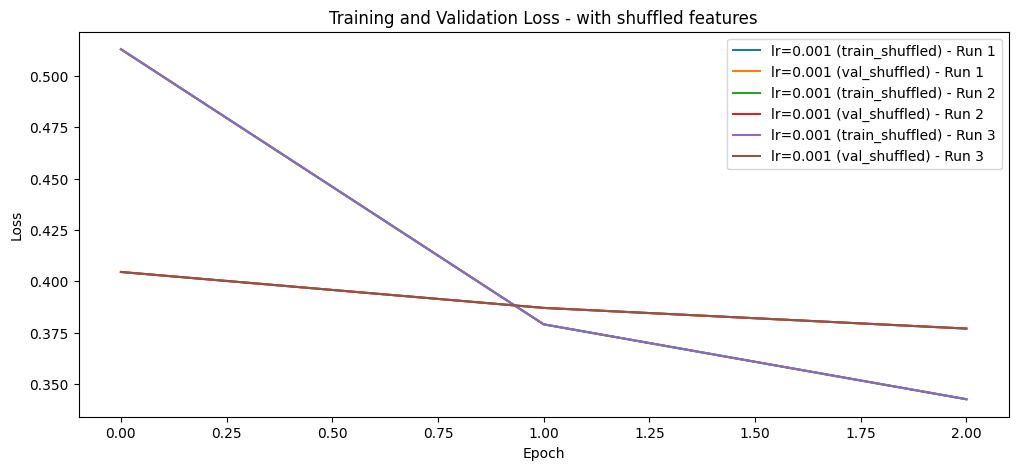

In [78]:
plt.figure(figsize=(12, 5))
for i, history in enumerate(histories_shuffled):
    plt.plot(history.history['loss'], label=f'lr={0.001} (train_shuffled) - Run {i+1}')
    plt.plot(history.history['val_loss'], label=f'lr={0.001} (val_shuffled) - Run {i+1}')
    
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss - with shuffled features')
plt.legend()
plt.show()


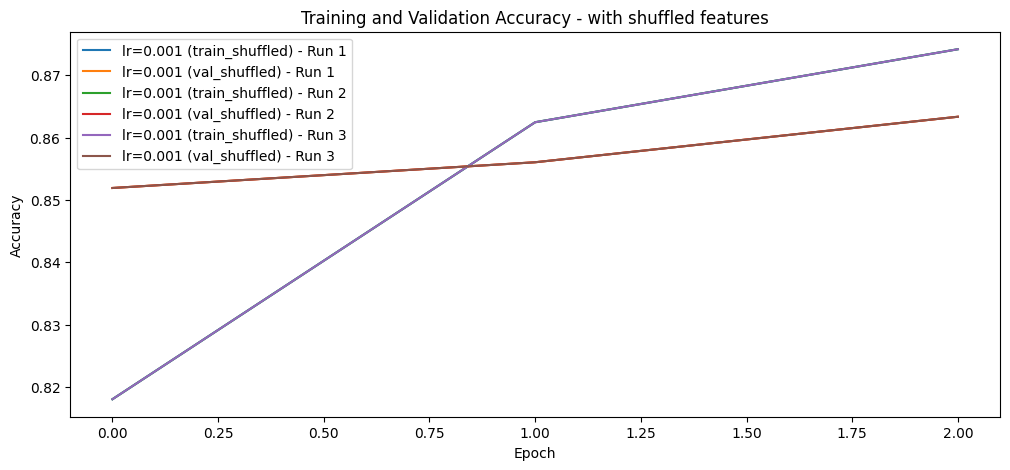

In [79]:
plt.figure(figsize=(12, 5))
for i, history in enumerate(histories_shuffled):
    plt.plot(history.history['accuracy'], label=f'lr={0.001} (train_shuffled) - Run {i+1}')
    plt.plot(history.history['val_accuracy'], label=f'lr={0.001} (val_shuffled) - Run {i+1}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy - with shuffled features')
plt.show()

In [80]:
# Training the model three times with fixed learning rate and three epochs each time - unshuffled features
hidden_layers = [64,128]
n_classes = 10
histories_unshuffled = []

for _ in range(3):
    model_unshuffled = get_model(hidden_layers=hidden_layers,
                      n_classes=n_classes)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model_unshuffled.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model_unshuffled.fit(x_train, y_train, epochs=3, validation_data=(x_val, y_val), verbose=1)
    histories_unshuffled.append(history)

C:\Users\Lenovo\nizaanth\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7745 - loss: 0.6464 - val_accuracy: 0.8516 - val_loss: 0.4053
Epoch 2/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8583 - loss: 0.3897 - val_accuracy: 0.8575 - val_loss: 0.3805
Epoch 3/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8730 - loss: 0.3466 - val_accuracy: 0.8670 - val_loss: 0.3586


C:\Users\Lenovo\nizaanth\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7745 - loss: 0.6464 - val_accuracy: 0.8516 - val_loss: 0.4053
Epoch 2/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8583 - loss: 0.3897 - val_accuracy: 0.8575 - val_loss: 0.3805
Epoch 3/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8730 - loss: 0.3466 - val_accuracy: 0.8670 - val_loss: 0.3586


C:\Users\Lenovo\nizaanth\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7745 - loss: 0.6464 - val_accuracy: 0.8516 - val_loss: 0.4053
Epoch 2/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8583 - loss: 0.3897 - val_accuracy: 0.8575 - val_loss: 0.3805
Epoch 3/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8730 - loss: 0.3466 - val_accuracy: 0.8670 - val_loss: 0.3586


# **6. Run inference**

In [81]:
test_loss_unshuffled, test_accuracy_unshuffled = model_unshuffled.evaluate(x_test, y_test)
print("Test Loss - unshuffled features:", test_loss_unshuffled)
print("Test Accuracy - unshuffled features:", test_accuracy_unshuffled)

test_loss_shuffled, test_accuracy_shuffled = model_shuffled.evaluate(x_test_shuffled, y_test_shuffled)
print("Test Loss - unshuffled features:", test_loss_shuffled)
print("Test Accuracy - unshuffled features:", test_accuracy_shuffled)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8751 - loss: 0.3443
Test Loss - unshuffled features: 0.34690994024276733
Test Accuracy - unshuffled features: 0.8711428642272949
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8680 - loss: 0.3605
Test Loss - unshuffled features: 0.35557785630226135
Test Accuracy - unshuffled features: 0.8705714344978333


## Final comments

- From the above Test data metrics, it can be inferred that MLP on shuffled features produces reproducible results
- Training the model based on both shuffled and unshuffled features produce similar and consistent results, this can be validated from the graphs model metrics, as both give an accuracy of around 87 percentage. (Refer 8. Train the model)
